02 Visualize reality check
===
Line chart one country all waves ~4 questions Female/Male + reality 

Note: the usp is, multiple questions at once (unlike violine) and good time-series representation (unlike radar) and reality added (unlike both former)

(Optional:
    coulor map when is which sex the better/worse predictor  (siehe anteil grün produzierter Strom am Verbrauch)
    lr forcast future/missing values
    lr to evaluate most predictive questions for reality/country/sex
)

In [1]:
#library
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#TODO: load both cleaned data sources
#load data
dfWVS = pd.read_csv('..//data//WVS_cleaned_10.csv')
HDR = pd.read_csv('..//data//HDR.csv')

#define variables
list3Countries=['Germany','China','Turkey']
list5Countries=['Germany','China','Turkey','Nigeria','Peru']
list10Countries =['Germany','China','Turkey','Nigeria','Peru','Iran','United States','Serbia','South Africa','Pakistan']
listGenderQuestions=['job', 'politician', 'university']
listDemographicQuestions=['sex', 'age', 'ethnic', 'status']
listIDColummns=['wave', 'wave_years', 'country', 'respondent_number', 'year']
listCountries = list10Countries
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
listYears = ['1994-1998','1999-2004','2005-2009','2010-2014','2017-2022']

1. Plot answers to job, uni, politician question per country over time 
2. Add Gender
3. Add ErrorBars
4. Add GII (2nd y axis!)
5. optional: adjust step size of GII
6. optional: subdata from GII (avr years edu, %parliament, %jobs)

In [47]:
# Data preprocessing for plots
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
gender=['Male', 'Female']
listCountries = ['Germany', 'China', 'Nigeria', 'Turkey', 'Iran', 'Serbia']
questions = ['university','politician', 'job']


def countrydata(data):
        
    data_gender = []
    data_gender.append(questions)

    for wave in listWaves:
        one_wave = data[data['wave'] == wave]
        waves = []

        for sex in gender:
            one_gender = one_wave[one_wave['sex'] == sex]
            normalized_means_wave = []

            for question in questions:
                means_by_country = one_gender[question].mean()

                if np.isnan(means_by_country):
                    normalized_means_wave.append(0.0)
                else:
                    #normalized per question -> scale of answers doesnt matter here
                    normalized_means_wave.append(means_by_country / one_gender[question].max())

            waves.append(normalized_means_wave)
            
        country_tuple = (wave, waves)
        data_gender.append(country_tuple)
    return data_gender
       
germany = countrydata(dfWVS[dfWVS['country'] == 'Germany'])
print(germany)

[['university', 'politician', 'job'], ('WVS3', [[0.7922673656618611, 0.765399737876802, 0.7933595456531236], [0.8355472901168969, 0.80605738575983, 0.8239461565710237]]), ('WVS4', [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]), ('WVS5', [[0.7768817204301075, 0.7365591397849462, 0.797747055811572], [0.8429228998849252, 0.8271001150747986, 0.8465669351745301]]), ('WVS6', [[0.8117206982543641, 0.756857855361596, 0.8054862842892768], [0.87, 0.8330555555555555, 0.8670370370370369]]), ('WVS7', [[0.8630073800738007, 0.8191881918819188, 0.8794587945879458], [0.9106317411402157, 0.8636363636363636, 0.9152542372881355]])]


In [ ]:
# Data preprocessing for plots
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
genders=['Male', 'Female']
countries = ['Germany', 'China', 'Nigeria', 'Turkey', 'Iran', 'Serbia']
questions = ['university','politician', 'job']

# Initialize a list to store the computed values
table_data = []

# Compute and store values for the table
for question in ['university', 'politician', 'job']:
    for gender in genders:
        for country in countries:
            subset = data[(data['sex'] == gender) & (data['country'] == country)]

            # Calculate average normalized answer based on the scale
            scale = max(subset[question])
            avg_normalized_answer = subset[question].mean() / scale

            table_data.append([country, gender, question, avg_normalized_answer])

# Create a DataFrame
table_df = pd.DataFrame(table_data, columns=["Country", "Gender", "Question", "Avg Normalized Answer"])

# Print the DataFrame
print(table_df)


In [55]:
# Data preprocessing for table
listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']
gender = ['Male', 'Female']
questions = ['university', 'politician', 'job']


def generate_table_per_country(data, country):
    data_country = []

    for wave in listWaves:
        one_wave = data[(data['wave'] == wave) & (data['country'] == country)]

        for sex in gender:
            one_gender = one_wave[one_wave['sex'] == sex]

            wave_data = {
                'Wave': wave,
                'Sex': sex,
                'Job': one_gender['job'].mean() / one_gender['job'].max(),
                'University': one_gender['university'].mean() / one_gender['university'].max(),
                'Politician': one_gender['politician'].mean() / one_gender['politician'].max()
            }

            data_country.append(wave_data)

    # Convert the list of dicts to a DataFrame
    df = pd.DataFrame(data_country)

    return df


countries = ['Germany', 'China', 'Nigeria', 'Turkey', 'Iran', 'Serbia']

# Example usage for Germany
germany_table = generate_table_per_country(dfWVS, 'Germany')
print(germany_table)
china_table = generate_table_per_country(dfWVS, 'China')
nigeria_table = generate_table_per_country(dfWVS, 'Nigeria')
turkey_table = generate_table_per_country(dfWVS, 'Turkey')
iran_table = generate_table_per_country(dfWVS, 'Iran')
serbia_table = generate_table_per_country(dfWVS, 'Serbia')

   Wave     Sex       Job  University  Politician
0  WVS3    Male  0.793360    0.792267    0.765400
1  WVS3  Female  0.823946    0.835547    0.806057
2  WVS4    Male       NaN         NaN         NaN
3  WVS4  Female       NaN         NaN         NaN
4  WVS5    Male  0.797747    0.776882    0.736559
5  WVS5  Female  0.846567    0.842923    0.827100
6  WVS6    Male  0.805486    0.811721    0.756858
7  WVS6  Female  0.867037    0.870000    0.833056
8  WVS7    Male  0.879459    0.863007    0.819188
9  WVS7  Female  0.915254    0.910632    0.863636


In [58]:
# colours
def plot_country_data(data):
        male_colors = ['darkgreen', 'darkcyan', 'orange']
        female_colors = ['lightgreen', 'cyan', 'yellow']

        fig, ax = plt.subplots(figsize=(10, 6))

        for i, (question, male_color, female_color) in enumerate(zip(germany_table.columns[2:], male_colors, female_colors)):
                male_data = germany_table[germany_table['Sex'] == 'Male'][question]
                female_data = germany_table[germany_table['Sex'] == 'Female'][question]

                ax.plot(germany_table[germany_table['Sex'] == 'Male']['Wave'], male_data,
                        label=f"Male - {question}", color=male_color)
                ax.plot(germany_table[germany_table['Sex'] == 'Female']['Wave'], female_data,
                        label=f"Female - {question}", color=female_color)

                # Calculate standard errors
                male_std = male_data.std()
                female_std = female_data.std()

                # Plot standard error bars
                ax.errorbar(germany_table[germany_table['Sex'] == 'Male']['Wave'], male_data,
                                yerr=male_std, fmt='none', color=male_color, capsize=5, alpha=0.3)
                ax.errorbar(germany_table[germany_table['Sex'] == 'Female']['Wave'], female_data,
                                yerr=female_std, fmt='none', color=female_color, capsize=5, alpha=0.3)

        ax.set_xlabel('Wave')
        ax.set_ylabel('Normalized Answer')
        ax.set_title('Comparison of Questions Over Time')
        ax.legend()

        plt.show()


AttributeError: 'list' object has no attribute 'columns'

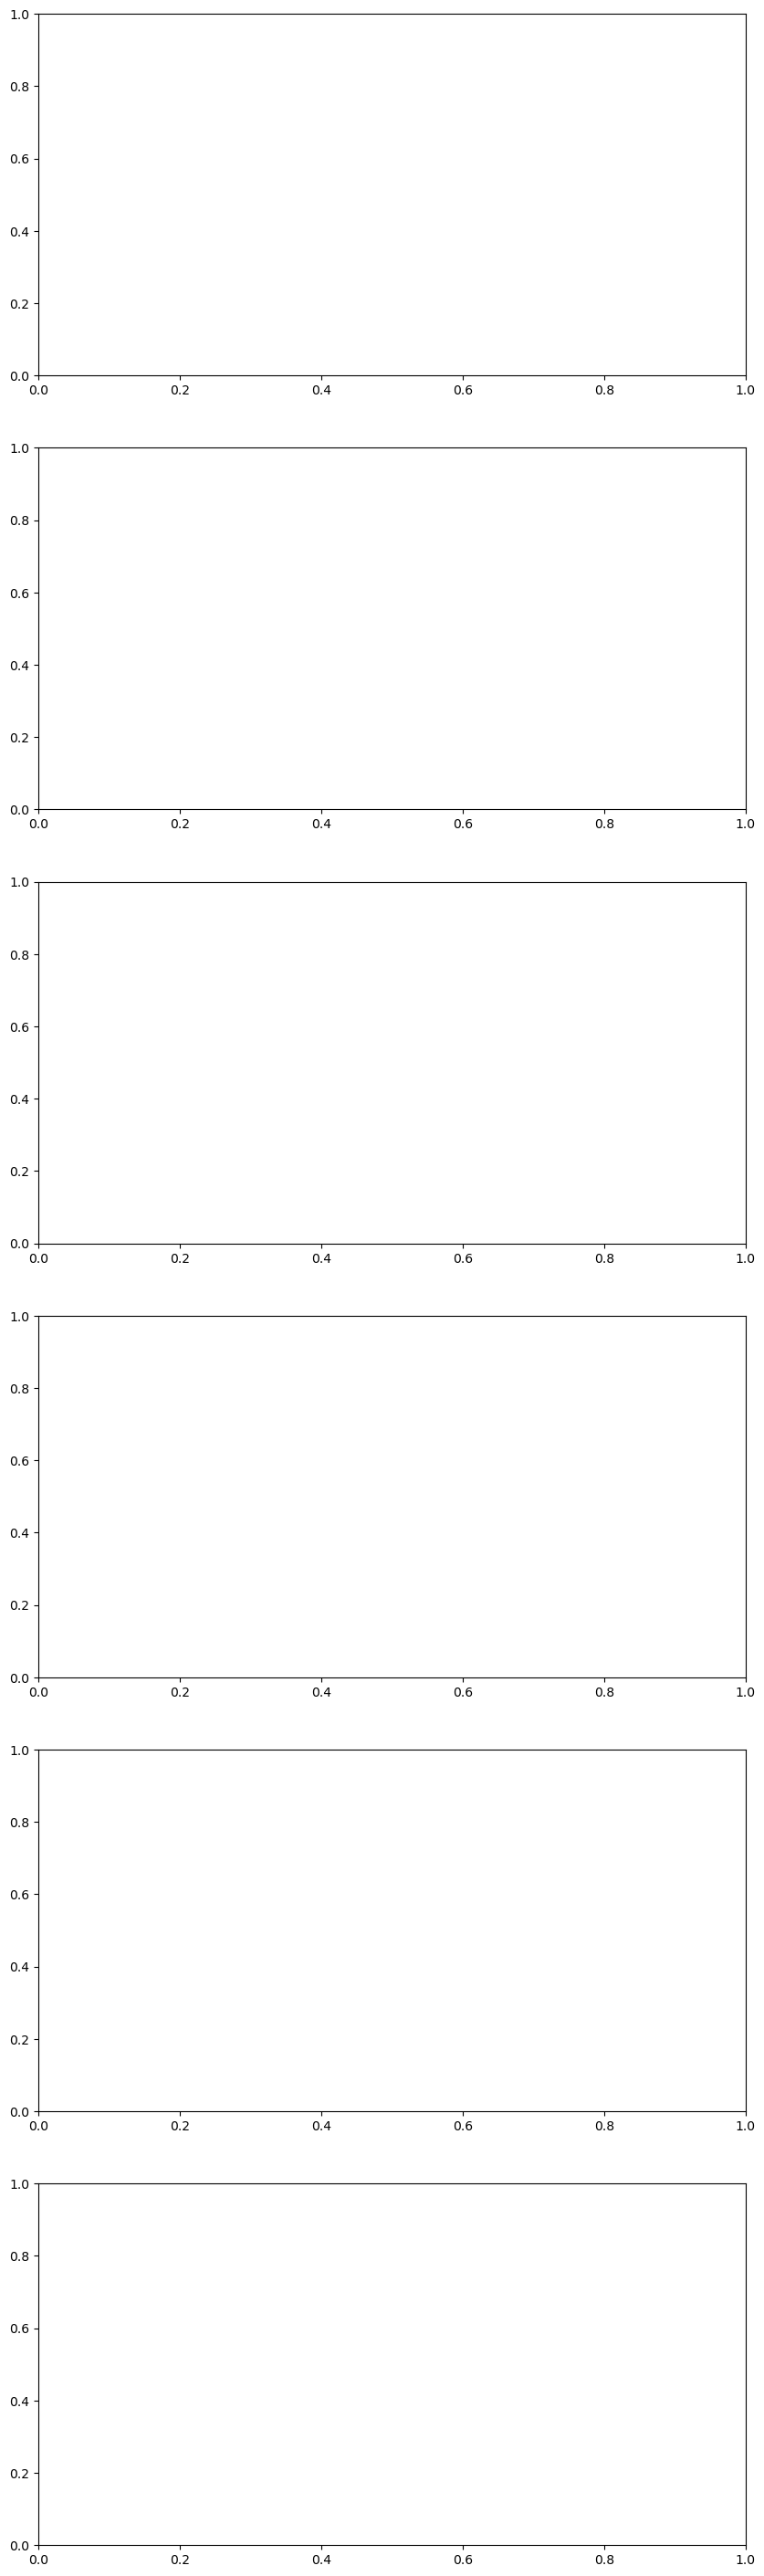

In [46]:

def plot_country_data(country_data, ax):
    # Define colors for Male and Female responses
    male_colors = ['steelblue', 'darkcyan', 'slategray']
    female_colors = ['lightsteelblue', 'lightcyan', 'lightgray']

    for i, (question, male_color, female_color) in enumerate(zip(country_data.columns[2:], male_colors, female_colors)):
        male_data = country_data[country_data['Sex'] == 'Male'][question]
        female_data = country_data[country_data['Sex'] == 'Female'][question]

        ax.plot(country_data[country_data['Sex'] == 'Male']['Wave'], male_data,
                label=f"Male - {question}", color=male_color)
        ax.plot(country_data[country_data['Sex'] == 'Female']['Wave'], female_data,
                label=f"Female - {question}", color=female_color)

        # Calculate standard errors
        male_std = male_data.std()
        female_std = female_data.std()

        # Plot standard error bars
        ax.errorbar(country_data[country_data['Sex'] == 'Male']['Wave'], male_data,
                    yerr=male_std, fmt='none', color=male_color, capsize=5, alpha=0.7)
        ax.errorbar(country_data[country_data['Sex'] == 'Female']['Wave'], female_data,
                    yerr=female_std, fmt='none', color=female_color, capsize=5, alpha=0.7)

    ax.set_xlabel('Wave')
    ax.set_ylabel('Normalized Answer')
    ax.set_title(f'Comparison of Questions Over Time - {country_data["Country"].iloc[0]}')
    ax.legend()


# List of countries
countries = ['Germany', 'China', 'Nigeria', 'Turkey', 'Iran', 'Serbia']


# Create subplots
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(10, 6 * len(countries)))

# Loop through countries
for country, ax in zip(countries, axes):
    # Get data for the country using your function
    country_data = countrydata(dfWVS[dfWVS['country'] == country])
    plot_country_data(country_data, ax)

plt.tight_layout()
plt.show()


In [17]:
data = dfWVS

# Extracting unique values for questions, gender, and countries
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
genders=['Male', 'Female']
countries = ['Germany', 'China', 'Nigeria', 'Turkey', 'Iran', 'Serbia']
questions = ['university','politician', 'job']

# Initialize a list to store the computed values
table_data = []

# Compute and store values for the table
for question in ['university', 'politician', 'job']:
    for gender in genders:
        for country in countries:
            subset = data[(data['sex'] == gender) & (data['country'] == country)]

            # Calculate average normalized answer based on the scale
            scale = max(subset[question])
            avg_normalized_answer = subset[question].mean() / scale

            table_data.append([country, gender, question, avg_normalized_answer])

# Create a DataFrame
table_df = pd.DataFrame(table_data, columns=["Country", "Gender", "Question", "Avg Normalized Answer"])

# Print the DataFrame
print(table_df)



    Country  Gender    Question  Avg Normalized Answer
0   Germany    Male  university               0.808194
1     China    Male  university               0.714201
2   Nigeria    Male  university               0.603202
3    Turkey    Male  university               0.718227
4      Iran    Male  university               0.588086
5    Serbia    Male  university               0.746611
6   Germany  Female  university               0.861194
7     China  Female  university               0.742565
8   Nigeria  Female  university               0.700899
9    Turkey  Female  university               0.756914
10     Iran  Female  university               0.676581
11   Serbia  Female  university               0.812142
12  Germany    Male  politician               0.766679
13    China    Male  politician               0.592172
14  Nigeria    Male  politician               0.410631
15   Turkey    Male  politician               0.545942
16     Iran    Male  politician               0.497254
17   Serbi

       Unnamed: 0  wave wave_years        country  respondent_number  year  \
0           20771  WVS7  2017-2022          China       1.567200e+08  2018   
1           20772  WVS7  2017-2022          China       1.567200e+08  2018   
2           20773  WVS7  2017-2022          China       1.567200e+08  2018   
3           20774  WVS7  2017-2022          China       1.567200e+08  2018   
4           20775  WVS7  2017-2022          China       1.567200e+08  2018   
...           ...   ...        ...            ...                ...   ...   
57554      428591  WVS6  2010-2014  United States       8.400622e+09  2011   
57555      428592  WVS6  2010-2014  United States       8.400622e+09  2011   
57556      428593  WVS6  2010-2014  United States       8.400622e+09  2011   
57557      428594  WVS6  2010-2014  United States       8.400622e+09  2011   
57558      428595  WVS6  2010-2014  United States       8.400622e+09  2011   

          sex   age                   ethnic     status top_ear

KeyError: 'question'

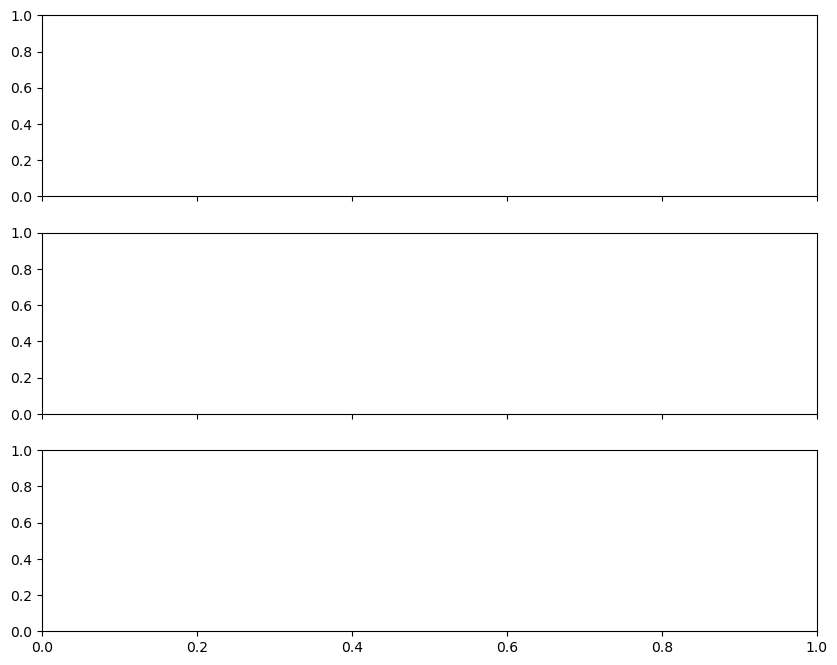

In [7]:
# Assuming you have your data in a pandas DataFrame, adjust accordingly
# Here, I'm using dummy data for demonstration purposes
countries = list10Countries
years = listYears
questions=['job', 'politician', 'university']
sex = ['Female', 'Male']

print(dfWVS)
fig, axes = plt.subplots(len(questions), 1, figsize=(10, 8), sharex=True)

for i, question in enumerate(questions):
    for gender in sex:
        for country in countries:
            subset = dfWVS[(dfWVS['question'] == question) & (dfWVS['sex'] == sex) & (dfWVS['country'] == country)]
            axes[i].plot(subset['year'], subset['normalized_answer'], label=f"{country} - {gender}")

    axes[i].set_ylabel(f"Normalized Answers - {question}")
    axes[i].legend()

plt.xlabel("Years")
plt.suptitle("Opinions on Women's Roles Over Time")

# Plotting GII data with a second y-axis on the right
fig, ax1 = plt.subplots(figsize=(10, 6))

for country in countries:
    subset = GII[GII['country'] == country]
    ax1.plot(subset['year'], subset['gii'], label=f"{country} - GII", linestyle='--')

ax1.set_xlabel('Years')
ax1.set_ylabel('GII Score', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis on the right
ax2 = ax1.twinx()
ax2.set_ylabel('Placeholder', color='tab:blue')  # This line is just to create a space between the two y-axes
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title("Gender Inequality Index (GII) Over Time")
plt.show()